# Mini Project: Crime Data, Vivian Upchurch and Haley Goldin

# The crime data set consists of data from 2020 to present. It was published by the LAPD on Data.Gov. The data set was created November 10, 2020 and updated October 4, 2024.

# We intend to clean and review the data, then answer the following questions. 
# #1 What year had the greatest number of incidents in the data frame?
# #2 What was the most commonly used weapon in the data frame?
# #3 What were the characteristics of crime in Hollywood?

In [1]:
import pandas as pd

df = pd.read_csv('s3://ia340-2024fall-2-777777/Crime_Data_from_2020_to_Present.csv') # load the data from s3

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:279: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

In [3]:
df.shape

(982638, 28)

In [4]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656471
Weapon Desc       656471
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913763
Crm Cd 3          980327
Crm Cd 4          982574
LOCATION               0
Cross Street      830789
LAT                    0
LON                    0
dtype: int64

In [5]:
df = df.drop('Crm Cd 3', axis=1)

In [6]:
df = df.drop('Crm Cd 2', axis=1)

In [7]:
df = df.drop('Crm Cd 4', axis=1)

In [8]:
df.shape

(982638, 25)

In [9]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON
count,9.826380e+05,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982624.000000,326167.000000,982627.000000,982638.000000,982638.000000
mean,2.197437e+08,1338.945426,10.700277,1116.459887,1.404253,500.823555,29.079817,306.133008,363.840882,500.578668,33.995725,-118.082225
std,1.294954e+07,651.537830,6.107808,610.893787,0.490747,206.211940,21.970094,219.053795,123.684663,206.010361,1.636729,5.672940
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.106089e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,34.014600,-118.430500
50%,2.208146e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,34.058900,-118.322500
75%,2.309153e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,34.334300,0.000000


In [10]:
df.set_index('AREA NAME',inplace=True) #define the index
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
AREA NAME,,,,,,,,,,,,,,,,,,,,,
Wilshire,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,784,1,510,VEHICLE - STOLEN,NaN,...,STREET,NaN,NaN,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
Central,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,NaN,34.0444,-118.2628
Southwest,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,356,1,480,BIKE - STOLEN,0344 1251,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,NaN,34.0210,-118.3002
Van Nuys,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
Hollywood,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,...,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,NaN,34.0944,-118.3277


In [11]:
df.loc['Hollywood'] #filter the data based on the index value


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
AREA NAME,,,,,,,,,,,,,,,,,,,,,
Hollywood,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,...,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,NaN,34.0944,-118.3277
Hollywood,230617817,11/14/2023 12:00:00 AM,11/13/2020 12:00:00 AM,2015,6,622,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,PARKING LOT,NaN,NaN,IC,Invest Cont,420.0,7200 FRANKLIN AV,NaN,34.1146,-118.3607
Hollywood,240604173,01/05/2024 12:00:00 AM,07/09/2020 12:00:00 AM,1230,6,637,2,354,THEFT OF IDENTITY,0928,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,354.0,6200 HOLLYWOOD BL,NaN,34.1030,-118.3225
Hollywood,220604399,01/10/2022 12:00:00 AM,09/19/2020 12:00:00 AM,1600,6,668,2,354,THEFT OF IDENTITY,1822,...,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,WILTON,LEXINGTON,34.0928,-118.3136
Hollywood,230606306,02/24/2023 12:00:00 AM,03/20/2020 12:00:00 AM,1800,6,622,2,661,UNAUTHORIZED COMPUTER ACCESS,1822 1914,...,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,661.0,8100 WILLOW GLEN RD,NaN,34.1162,-118.3738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hollywood,240611805,09/11/2024 12:00:00 AM,09/11/2024 12:00:00 AM,615,6,645,2,888,TRESPASSING,1501 1822,...,METROLINK TRAIN,NaN,NaN,IC,Invest Cont,888.0,6800 HOLLYWOOD BL,NaN,34.1016,-118.3387
Hollywood,240610331,07/02/2024 12:00:00 AM,07/02/2024 12:00:00 AM,1130,6,666,1,330,BURGLARY FROM VEHICLE,1822 1300 0344 1501,...,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,330.0,1100 VINE ST,NaN,34.0907,-118.3266
Hollywood,240608490,04/13/2024 12:00:00 AM,04/12/2024 12:00:00 AM,1925,6,663,1,440,THEFT PLAIN - PETTY ($950 & UNDER),1501,...,SIDEWALK,NaN,NaN,IC,Invest Cont,440.0,WILLOUGHBY AV,N LAS PALMAS,34.0871,-118.3363


In [12]:
df.to_csv('clean_data.csv') #store the cleaned data to local computer

In [13]:
df= pd.read_csv('clean_data.csv')
df['date'] = pd.to_datetime(df['DATE OCC'])
df.info()

/tmp/ipykernel_25312/2732332405.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['DATE OCC'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AREA NAME       982638 non-null  object        
 1   DR_NO           982638 non-null  int64         
 2   Date Rptd       982638 non-null  object        
 3   DATE OCC        982638 non-null  object        
 4   TIME OCC        982638 non-null  int64         
 5   AREA            982638 non-null  int64         
 6   Rpt Dist No     982638 non-null  int64         
 7   Part 1-2        982638 non-null  int64         
 8   Crm Cd          982638 non-null  int64         
 9   Crm Cd Desc     982638 non-null  object        
 10  Mocodes         837376 non-null  object        
 11  Vict Age        982638 non-null  int64         
 12  Vict Sex        844193 non-null  object        
 13  Vict Descent    844182 non-null  object        
 14  Premis Cd       982624 non-null  flo

In [14]:
df.shape

(982638, 26)

In [15]:
df.head()

,AREA NAME,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON,date
0,Wilshire,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,784,1,510,VEHICLE - STOLEN,...,NaN,NaN,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01
1,Central,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,182,1,330,BURGLARY FROM VEHICLE,...,NaN,NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-08
2,Southwest,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,356,1,480,BIKE - STOLEN,...,NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-04
3,Van Nuys,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020-03-10
4,Hollywood,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,666,2,354,THEFT OF IDENTITY,...,NaN,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,NaN,34.0944,-118.3277,2020-08-17


In [16]:
pip install jupyter-ai~=1.0

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install jupyter-ai[all]

Note: you may need to restart the kernel to use updated packages.


In [18]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [19]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [20]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [21]:
%%ai gpt4
what is in {df}

The given data appears to be a crime report log with a total of 982,638 entries. Each entry of this log provides an extensive amount of information about a specific crime event.

Here's what each column represents:

- **AREA NAME**: The name of the area where the crime occurred.
- **DR_NO**: The unique identifier or number of the report.
- **Date Rptd & DATE OCC**: The dates when the crime was reported and occurred.
- **TIME OCC**: The time when the crime occurred.
- **AREA**: A coded representation of the area.
- **Rpt Dist No**: Report District Number, a kind of code that represents a specific district.
- **Part 1-2**: A categorical variable that splits crimes into Part I and Part II offenses for UCR reporting.
- **Crm Cd**: The crime code.
- **Crm Cd Desc**: A description of the crime, based on the crime code.
- **Mocodes**: Modus Operandi codes, the method of operation of the criminals.
- **Vict Age, Vict Sex, Vict Descent**: Information about the victim's age, sex, and descent.
- **Premis Cd, Premis Desc**: Information about the type of location where the crime occurred (coded and descriptive).
- **Weapon Used Cd, Weapon Desc**: Information about the weapon used (coded and descriptive).
- **Status, Status Desc**: Information about the status of the crime investigation (coded and descriptive).
- **Crm Cd 1**: Another crime code.
- **LOCATION**: The specific location where the crime occurred.
- **Cross Street**: The nearest cross street to the crime location.
- **LAT, LON**: The latitude and longitude coordinates of the crime location.
- **date**: The date when the crime occurred.

This dataset could be used for various purposes, such as crime trend analysis, hotspot identification, resource allocation, and predictive policing.

In [22]:
%%ai gpt4 -f code
count the number of incidents in year with the data in {df} dataframe
show the result on a line chart

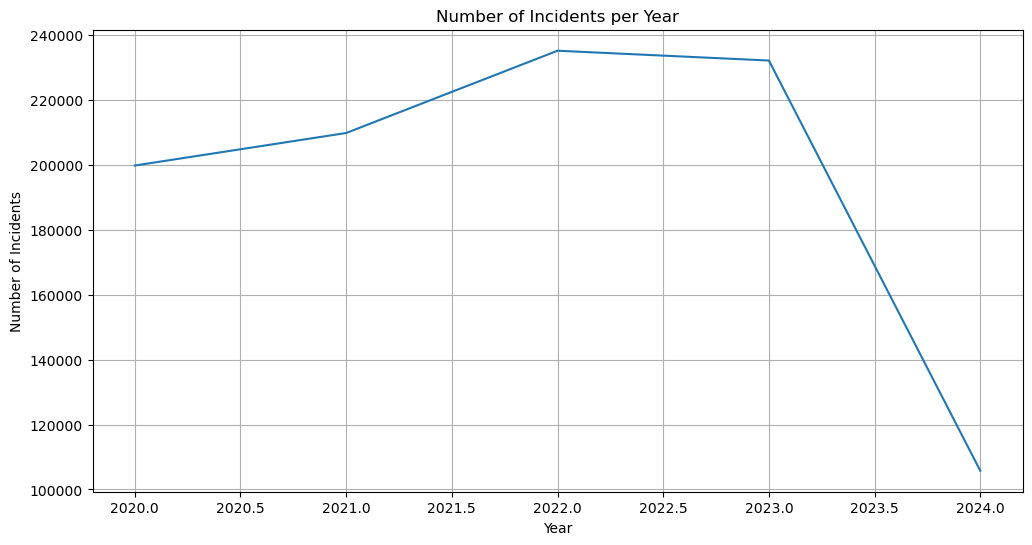

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named 'df'
df['year'] = pd.DatetimeIndex(df['date']).year
incidents_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(incidents_per_year.index, incidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Year')
plt.grid(True)
plt.show()


In [25]:
%%ai gpt4 -f code
What is the most commonly used weapon in the {df}
show the result in a bar graph

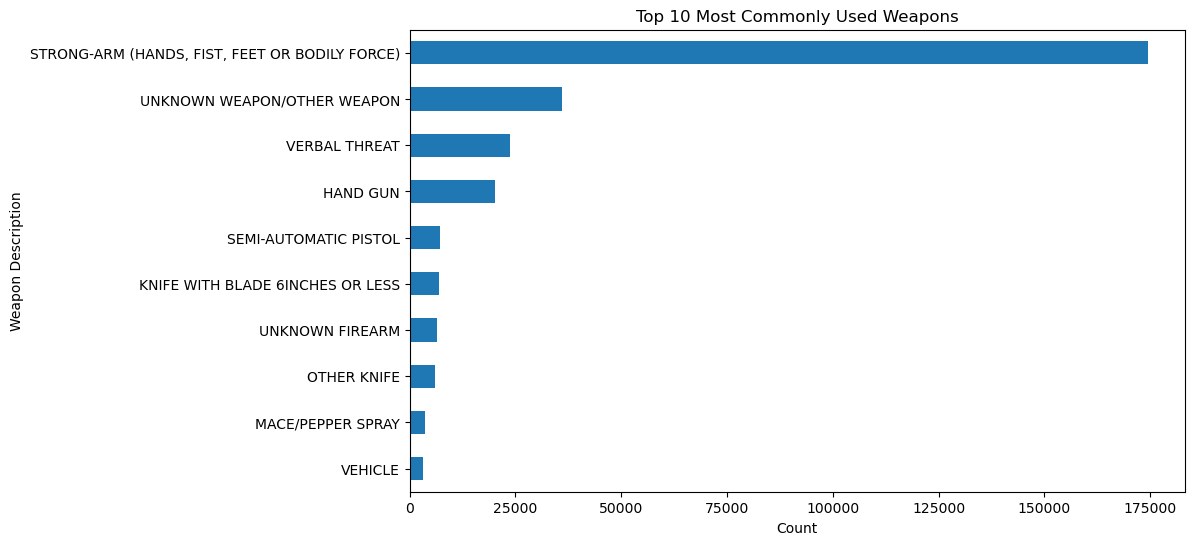

In [26]:
weapon_counts = df['Weapon Desc'].value_counts()

plt.figure(figsize=(10,6))
weapon_counts[:10].plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Weapon Description')
plt.title('Top 10 Most Commonly Used Weapons')
plt.gca().invert_yaxis()
plt.show()